In [31]:
import pandas as pd
from pandas import Series,DataFrame
from sklearn.utils import shuffle
import os
cwd = os.getcwd()
print(cwd)
os.chdir('C:\\Users\\G560667\\All-Data\\')
print(cwd)

C:\Users\G560667\All-Data
C:\Users\G560667\All-Data


In [32]:
# numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
print(cwd)

C:\Users\G560667\All-Data


In [34]:
df = pd.read_csv('train.csv')

df_test=pd.read_csv('test.csv')

In [35]:
df.describe
df_test.describe

<bound method NDFrame.describe of         ID  satisfaction_level  last_evaluation_rating  projects_worked_on  \
0        1                 7.2                     8.7                   6   
1        2                 4.5                     5.4                   3   
2        3                 4.1                     5.5                   3   
3        4                 3.6                     5.6                   3   
4        5                 4.5                     4.7                   3   
5        6                 7.8                     9.9                   5   
6        7                 4.5                     5.1                   3   
7        8                 0.9                     9.5                   7   
8        9                 4.6                     5.7                   3   
9       10                 4.0                     5.3                   3   
10      11                 3.8                     5.0                   3   
11      12                 4.5

In [36]:
df.shape
df_test.shape

(4507, 11)

In [37]:
print(df.describe())
print(df_test.describe())

       satisfaction_level  last_evaluation_rating  projects_worked_on  \
count        25491.000000            25491.000000        25491.000000   
mean             6.137704                7.167832            4.215174   
std              2.486316                1.710754            1.324228   
min              0.900000                3.600000            2.000000   
25%              4.400000                5.600000            3.000000   
50%              6.500000                7.200000            4.000000   
75%              8.200000                8.700000            5.000000   
max             10.000000               10.000000            8.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          25491.000000        25491.000000   25491.000000   
mean             205.286846            3.497156       0.146012   
std               50.182916            1.457715       0.353125   
min               96.000000            2.000000       0.000000   
25%         

In [38]:
df.info()
#--------------------
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
satisfaction_level        25491 non-null float64
last_evaluation_rating    25491 non-null float64
projects_worked_on        25491 non-null int64
average_montly_hours      25491 non-null int64
time_spend_company        25491 non-null int64
Work_accident             25491 non-null int64
promotion_last_5years     25491 non-null int64
Department                25491 non-null object
salary                    25491 non-null object
Attrition                 25491 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 11 columns):
ID                        4507 non-null int64
satisfaction_level        4507 non-null float64
last_evaluation_rating    4507 non-null float64
projects_worked_on        4507 non-null int64
average_montly_hours      4507 non-null int64
time_spend_c

In [39]:
df.tail()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
25486,4.0,5.7,2,151,3,0,0,support,low,1
25487,3.7,4.8,2,160,3,0,0,support,low,1
25488,3.7,5.3,2,143,3,0,0,support,low,1
25489,1.1,9.6,6,280,4,0,0,support,low,1
25490,3.7,5.2,2,158,3,0,0,support,low,1


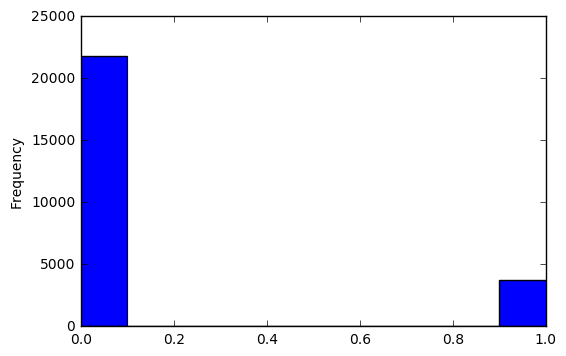

In [40]:
df['Work_accident'].plot(kind='hist')

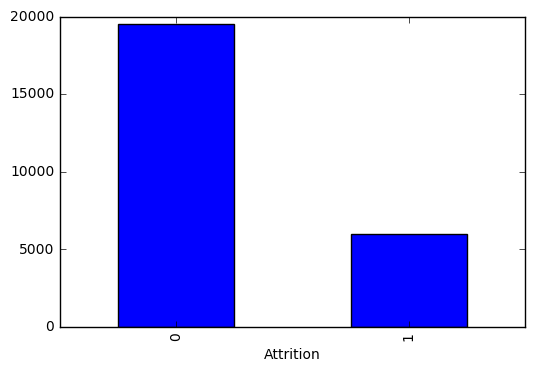

In [41]:
df.groupby('Attrition').size().plot(kind='bar')

In [42]:
import seaborn as sns

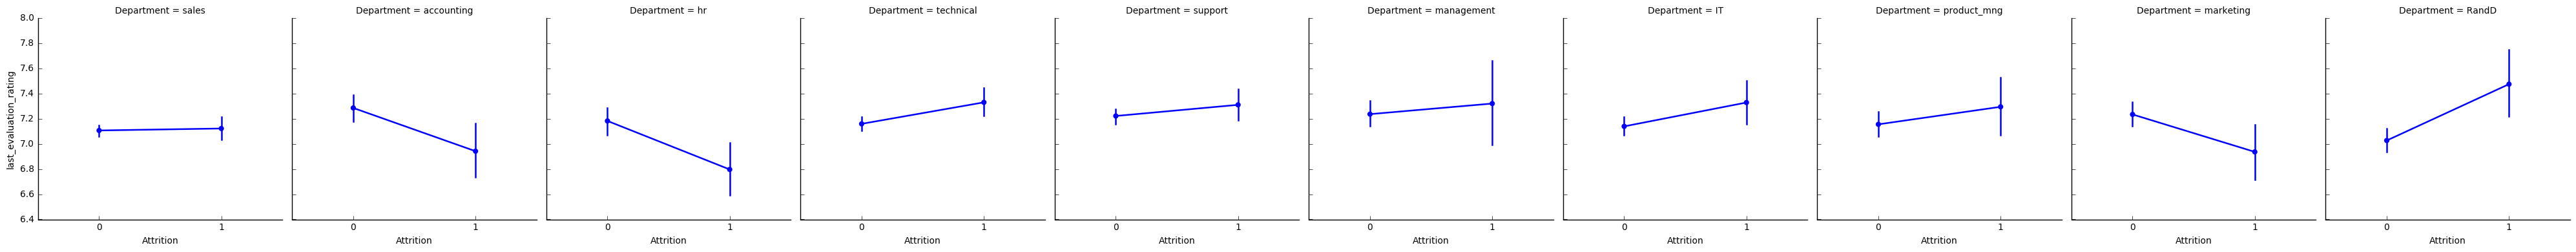

In [43]:
sns.factorplot(data=df, x="Attrition", y="last_evaluation_rating",col="Department")

C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


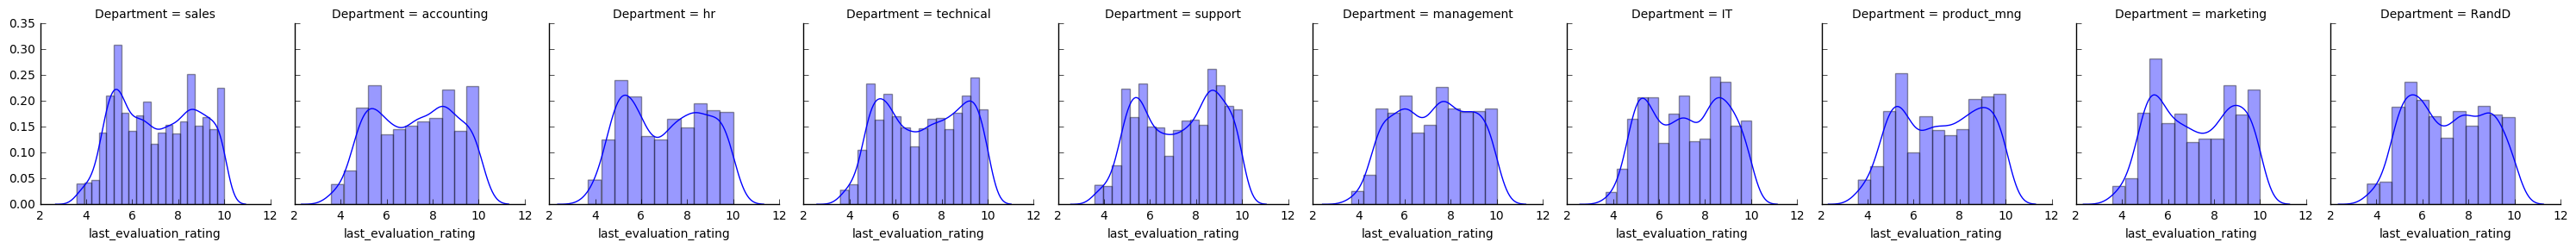

In [44]:
g = sns.FacetGrid(df, col="Department") 
g.map(sns.distplot, "last_evaluation_rating")

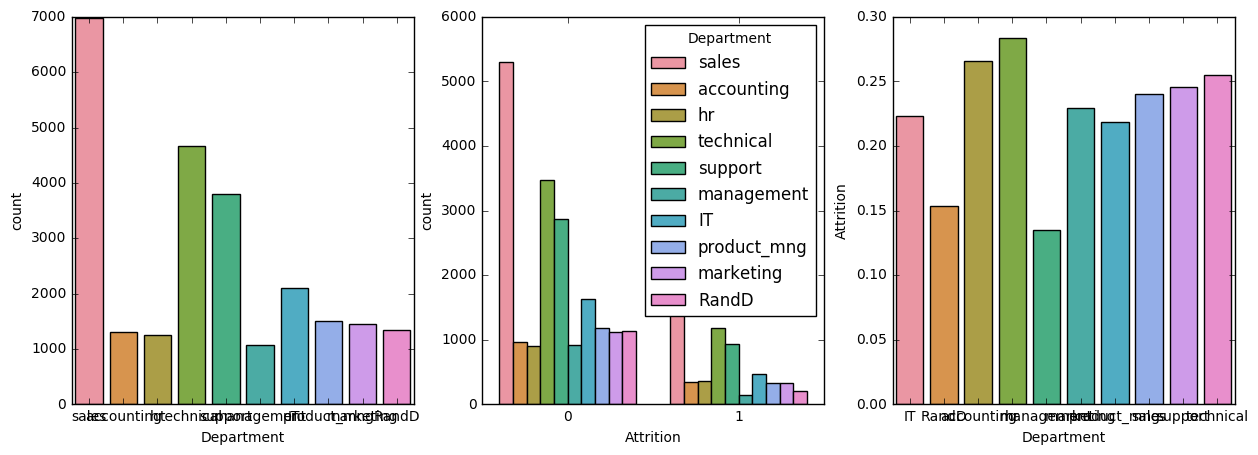

In [45]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Department', data=df, ax=ax[0])
sns.countplot(x='Attrition', hue="Department", data=df, ax=ax[1])

##Attrition By Department
Attrib = df[["Department", "Attrition"]].groupby(['Department'],as_index=False).mean()
sns.barplot(x='Department', y='Attrition', data=Attrib,ax=ax[2])
#Attrib

In [46]:
## Do it on Train and Test Set

department_dummies  = pd.get_dummies(df['Department'])
df = df.join(department_dummies)
df.drop(['Department'], axis=1,inplace=True)

department_dummies  = pd.get_dummies(df_test['Department'])
df_test = df_test.join(department_dummies)
df_test.drop(['Department'], axis=1,inplace=True)

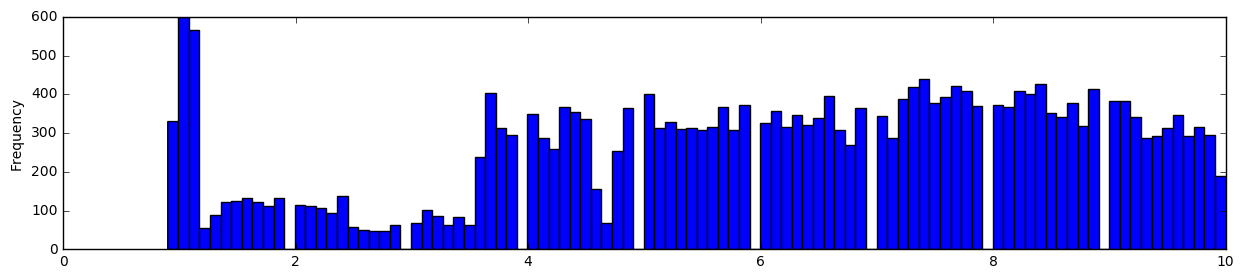

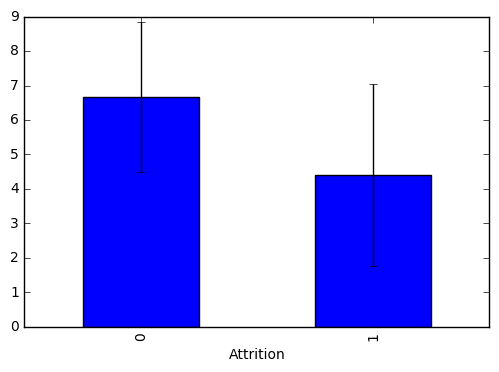

In [47]:
## satisfaction_level analysis
satisf_left= df["satisfaction_level"][df["Attrition"] == 0]
satisf_not_left = df["satisfaction_level"][df["Attrition"] == 1]

avgerage_satisf = DataFrame([satisf_left.mean(), satisf_not_left.mean()])
std_satisf      = DataFrame([satisf_left.std(), satisf_not_left.std()])

df['satisfaction_level'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,10))

avgerage_satisf.index.names = std_satisf.index.names = ["Attrition"]
avgerage_satisf.plot(yerr=std_satisf,kind='bar',legend=False)

In [48]:
## Salary Analysis

salary_dummies  = pd.get_dummies(df['salary'])
df = df.join(salary_dummies)
df.drop(['salary'], axis=1,inplace=True)

salary_dummies   = pd.get_dummies(df_test['salary'])
df_test = df_test.join(salary_dummies)
df_test.drop(['salary'], axis=1,inplace=True)

In [49]:
#promotion_last_5years

promotion_dummies  = pd.get_dummies(df['promotion_last_5years'])
df = df.join(promotion_dummies)
df.drop(['promotion_last_5years'], axis=1,inplace=True)

promotion_dummies   = pd.get_dummies(df_test['promotion_last_5years'])
df_test = df_test.join(promotion_dummies)
df_test.drop(['promotion_last_5years'], axis=1,inplace=True)

In [50]:
#Work_accident

acc_dummies  = pd.get_dummies(df['Work_accident']).rename(columns=lambda x: 'Category_' + str(x))
df = df.join(acc_dummies)
df.drop(['Work_accident'], axis=1,inplace=True)

acc_dummies   = pd.get_dummies(df_test['Work_accident']).rename(columns=lambda x: 'Category_' + str(x))
df_test = df_test.join(acc_dummies)
df_test.drop(['Work_accident'], axis=1,inplace=True)

In [51]:
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,IT,RandD,accounting,hr,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,3.8,5.3,3,167,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
#time_spend_company--DOnt do

#work_dummies  = pd.get_dummies(df['time_spend_company']).rename(columns=lambda x: 'time_spend_company_' + str(x))
#df = df.join(work_dummies)
#df.drop(['time_spend_company'], axis=1,inplace=True)

#work_dummies   = pd.get_dummies(df_test['time_spend_company']).rename(columns=lambda x: 'time_spend_company_' + str(x))
#df_test = df_test.join(work_dummies)
#df_test.drop(['time_spend_company'], axis=1,inplace=True)

In [53]:
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,IT,RandD,accounting,hr,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,3.8,5.3,3,167,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [54]:
#projects_worked_on--dont do

#project_dummies  = pd.get_dummies(df['projects_worked_on']).rename(columns=lambda x: 'projects_worked_on_' + str(x))
#df = df.join(project_dummies)
#df.drop(['projects_worked_on'], axis=1,inplace=True)

#project_dummies   = pd.get_dummies(df_test['projects_worked_on']).rename(columns=lambda x: 'projects_worked_on_' + str(x))
#df_test = df_test.join(project_dummies)
#df_test.drop(['projects_worked_on'], axis=1,inplace=True)

In [55]:
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,IT,RandD,accounting,hr,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,3.8,5.3,3,167,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [56]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=min_max.fit_transform(df[['satisfaction_level', 'last_evaluation_rating',
                'average_montly_hours']])
df_test_minmax=min_max.fit_transform(df_test[['satisfaction_level', 'last_evaluation_rating',
                'average_montly_hours']])

In [82]:
X_train=df.drop('Attrition', axis=1)
y_train=df['Attrition']

X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
X_test.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,7.2,8.7,6,233,5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.5,5.4,3,145,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,4.1,5.5,3,158,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.6,5.6,3,147,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.5,4.7,3,170,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [58]:
from sklearn.preprocessing import scale
df_scale=scale(X_train)
df_test_scale=scale(X_test)

In [59]:
X_train.head()
#X_test.shape
X_train.columns

Index([    'satisfaction_level', 'last_evaluation_rating',
           'projects_worked_on',   'average_montly_hours',
           'time_spend_company',                     'IT',
                        'RandD',             'accounting',
                           'hr',             'management',
                    'marketing',            'product_mng',
                        'sales',                'support',
                    'technical',                   'high',
                          'low',                 'medium',
                              0,                        1,
                   'Category_0',             'Category_1'],
      dtype='object')

In [60]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)
## Logistics Regression without Scaling --78.75% Training Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [61]:
#Accuracy slightly improved with Scaling
logreg = LogisticRegression()
logreg.fit(df_scale, y_train)
Y_pred = logreg.predict(X_test)
#logreg.score(df_scale, y_train)
## Logistics Regression without Scaling --78.75% Training Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(df_test_scale, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [62]:
# Support Vector Machines
svc = SVC()
svc.fit(df_scale, y_train)
Y_pred = svc.predict(X_test)
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(df_test_scale, y_test)))

## Accuracy 95%

Accuracy of SVC classifier on test set: 0.95


In [63]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(df_scale, y_train)
Y_pred = random_forest.predict(X_test)
print('Accuracy of random_forest on test set: {:.2f}'.format(random_forest.score(df_test_scale, y_test)))

## Accuracy 97%

Accuracy of random_forest on test set: 0.97


In [64]:
##KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(df_scale, y_train)
Y_pred = knn.predict(X_test)
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(df_test_scale, y_test)))

##Accuracy 98%

Accuracy of KNN on test set: 0.98


In [65]:
##Grid Search on Randon forests
from sklearn.model_selection.GridSearchCV import GridSearchCV

param_grid = {'n_estimators': np.arange(50, 150)}

tree = GridSearchCV(RandomForestClassifier(), param_grid)
tree.fit(df_scale, y_train)
Y_pred = tree.predict(X_test)[:,1]
print('Accuracy of random_forest on test set: {:.2f}'.format(roc_auc_score(df_test_scale, Y_pred)))

ImportError: No module named 'sklearn.model_selection'

In [66]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(df_scale, y_train)
Y_pred = gaussian.predict(X_test)
print('Accuracy of Gaussian Naive Bayes on test set: {:.2f}'.format(gaussian.score(df_test_scale, y_test)))

##Accuracy 50%

Accuracy of Gaussian Naive Bayes on test set: 0.50


In [67]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(df.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,satisfaction_level,-1.004650
1,last_evaluation_rating,0.098953
2,projects_worked_on,-0.363422
3,average_montly_hours,0.228856
4,time_spend_company,0.387583
5,Attrition,-0.028490
6,IT,-0.114764
7,RandD,0.017700
8,accounting,0.064333
9,hr,-0.090614


In [ ]:
##need to work

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score



##Join test and Train

#df_merge=pd.append([df_scale, df_test_scale])
#y_merge=pd.concat([X_test, y_test])
df_merge = X_train.append(X_test, ignore_index=True)
df_merge=scale(df_merge)

numFolds = 10
kf = KFold(len(df_merge), numFolds, shuffle=True)

# These are "Class objects". For each Class, find the AUC through
# 10 fold cross validation.
Models = [LogisticRegression, SGDClassifier]
params = [{}, {"loss": "log", "penalty": "l2", 'n_iter':1000}]
for param, Model in zip(params, Models):
    total = 0
    for train_indices, test_indices in kf:
        train_X = df_merge[train_indices, :]; train_Y = df_merge[train_indices]
        test_X = df_merge[test_indices, :]; test_Y = df_merge[test_indices]

        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        total += accuracy_score(test_Y, predictions)
    accuracy = total / numFolds
    print ("Accuracy score of {0}: {1}".format(Model.__name__, accuracy))

In [ ]:
kf = KFold(len(df_merge), numFolds, shuffle=True)
kf

In [68]:
from sklearn.preprocessing import scale
df_scale=scale(X_train)
df_test_scale=scale(X_test)

In [71]:
#df_cv=pd.DataFrame(df_scale)
#df_test_cv=pd.DataFrame(df_scale)

In [83]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print ('\n',CV_rfc.best_params_)


 {'n_estimators': 700, 'max_features': 'auto'}


In [84]:
Y_pred = CV_rfc.predict(X_test)
print('Accuracy of random_forest on test set: {:.2f}'.format(CV_rfc.score(X_test, y_test)))

Accuracy of random_forest on test set: 0.99


In [88]:
X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
X_test.head()
Y_pred = CV_rfc.predict(X_test)
print('Accuracy of random_forest on test set: {:.2f}'.format(CV_rfc.score(X_test, y_test)))
#Random forest with 200 estimators accuracy 0.99

Accuracy of random_forest on test set: 0.99


In [91]:
Y_pred_proba = CV_rfc.predict_proba(X_test)

In [92]:
Y_pred_proba

array([[ 0.06428571,  0.93571429],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       ..., 
       [ 0.01857143,  0.98142857],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ]])

In [ ]:
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition": max_value(Y_pred_proba)
        
    })
submission

In [ ]:
def max_value(inputlist):
    return ([sublist[-1] for sublist in inputlist])

print (max_value(Y_pred_proba))

In [112]:
submission = submission[["ID","Attrition"]] 
submission.to_csv('submission.csv', index=False,cols=["ID","Attrition"])